***Importing Libraries***


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 ***Importing the dataset directly from URL using pandas:***

In [28]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


***Plotting Hours vs Percentage of scores***

In [29]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


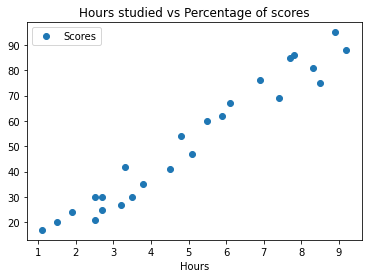

In [30]:
df.plot(x='Hours',y='Scores',kind='line',style='o')
plt.title('Hours studied vs Percentage of scores')
plt.xlabel=('Hours studied')
plt.ylabel=('Percentage of scores')
plt.show()

***Preparing the Data***

In [31]:
X=df.iloc[:, :-1].values
X
X.shape

(25, 1)

In [32]:
Y=df.iloc[:,-1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

***Splitting this data into training and test sets***

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

***Training the Data***

In [34]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


***To retrieve the intercept***

In [35]:
print(regressor.intercept_)

2.018160041434662


***For retrieving the slope (coefficient of x)***

In [36]:
print(regressor.coef_)

[9.91065648]


***Plotting for the test data***

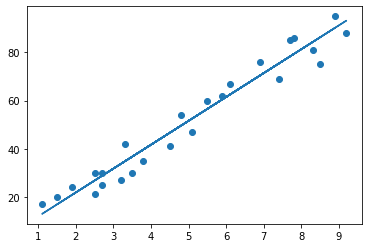

In [37]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

***Making Predictions as Follows:***

In [38]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


***Comparing Actual vs Predicted***

In [39]:

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


***Testing with our own data***

In [40]:

hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


***Evaluating the Algorithm***

In [41]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
